# cognee - Get Started

## Let's talk about the problem first

###  -  Since LLMs appeared, people have tried to personalize them.
###  -  People do "prompt engineering" and add specific instructions to the LLM
###  - "Become a sales agent" or "Become a programmer"

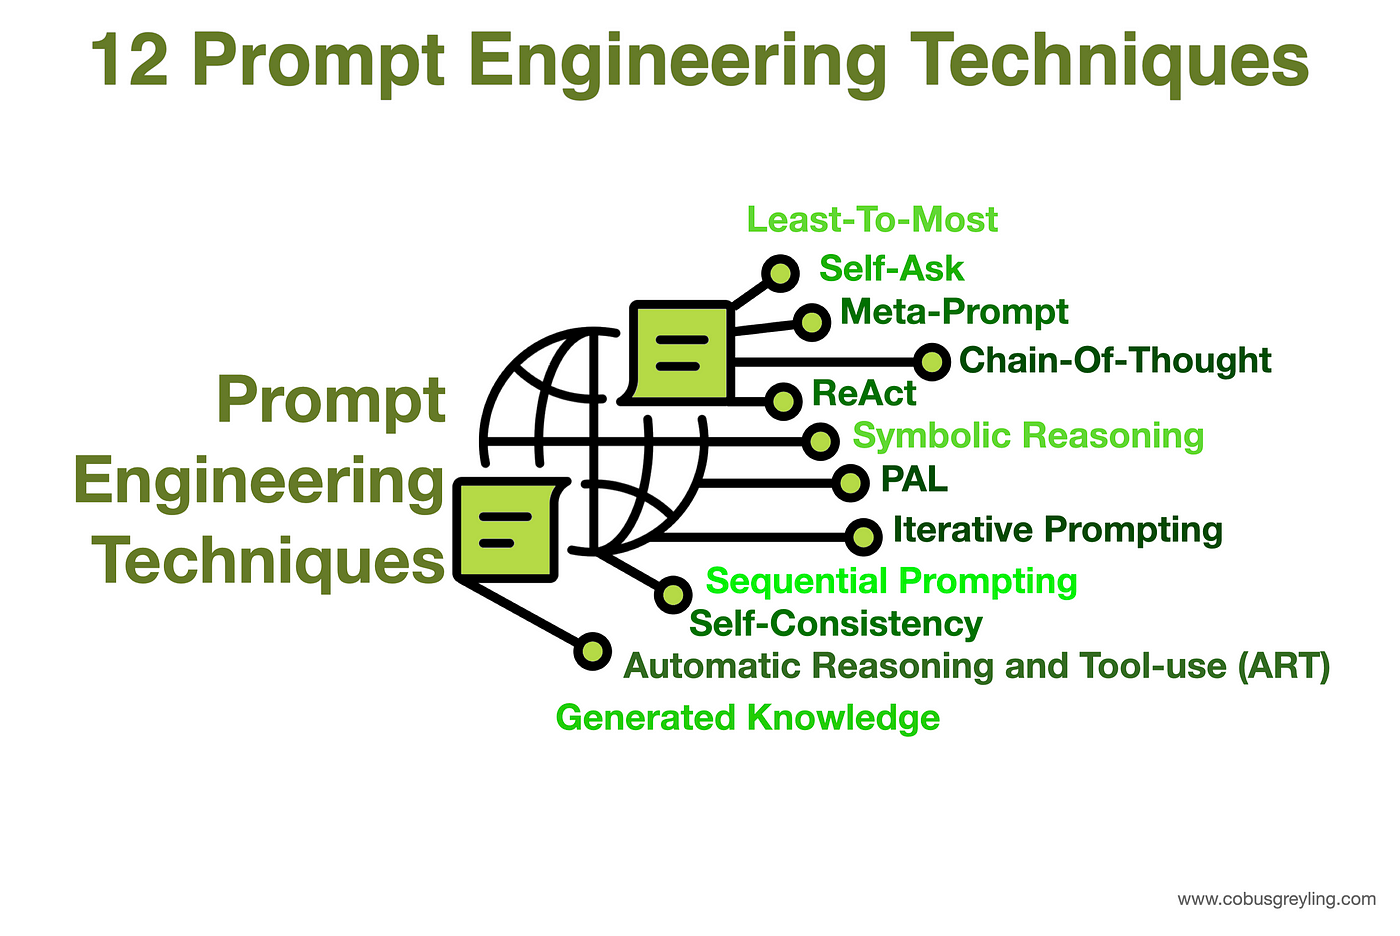

## The next solution was RAGs 

RAGs (Retrieval Augmented Generation) are systems that connect to a vector store and search for similar data so they can enrich LLM response.

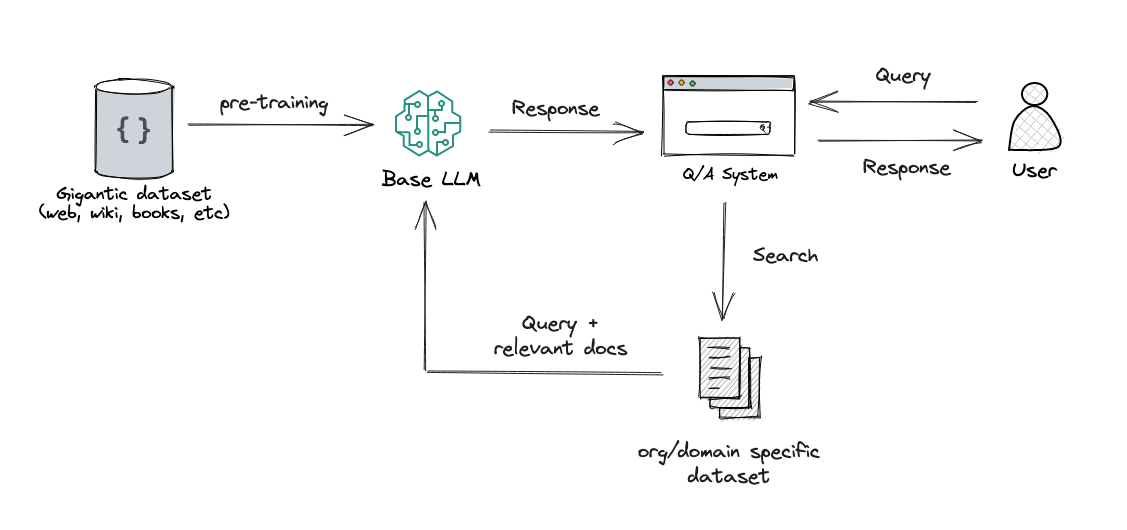


## If you search for "I like apple", what will you get:
###  1. I dislike fruits
### 2. I am a vegan
### 3. I don't like apples

## Semantic similarity search is not magic
### If you search for an apple, the closest thing you get is that you don't like apples.
### Would it be nice to have a semantic model LLMs could use?


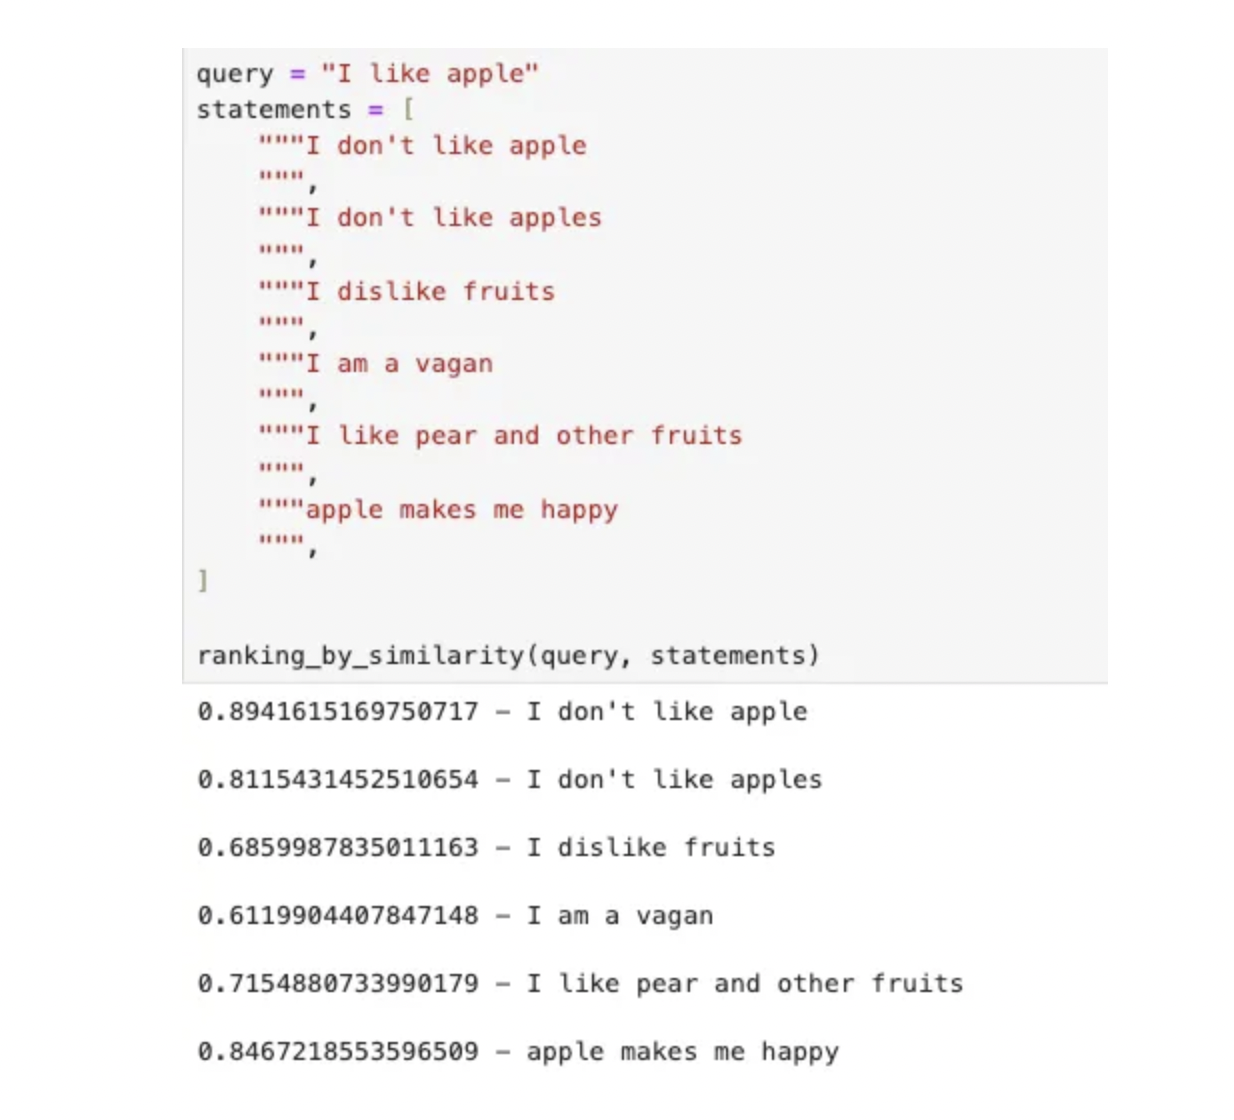

# That is where Cognee comes in

### Our goal is to:
- create a semantic representation of the data 
- split the data into a multilayer graph network containing propositions

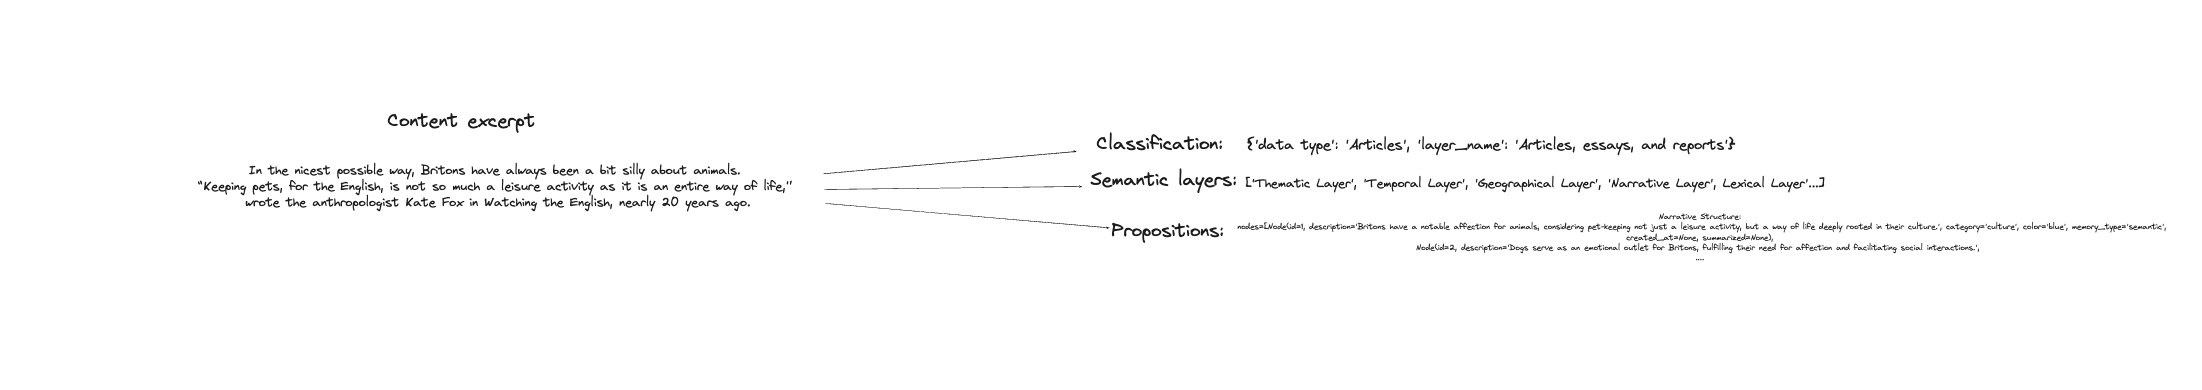

## What is a semantic layer and what are propositions

- Multilayer network is cognitive multilayer networks as a quantitative and interpretative framework for investigating the mental lexicon. 
- The mental lexicon is a complex cognitive system representing information about the words/concepts that one knows
Article 2


- Propositions are defined as atomic expressions within text, each encapsulating a distinct factoid and presented in a concise, self-contained natural language format.
Article 1

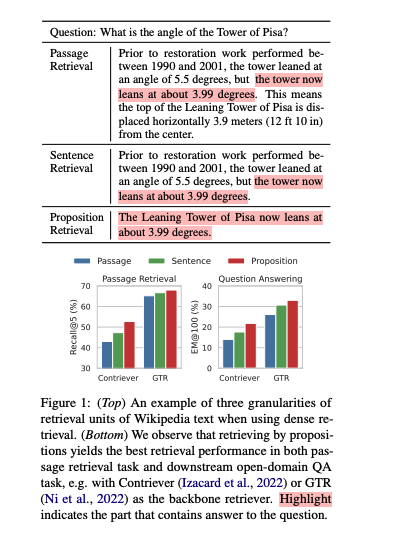 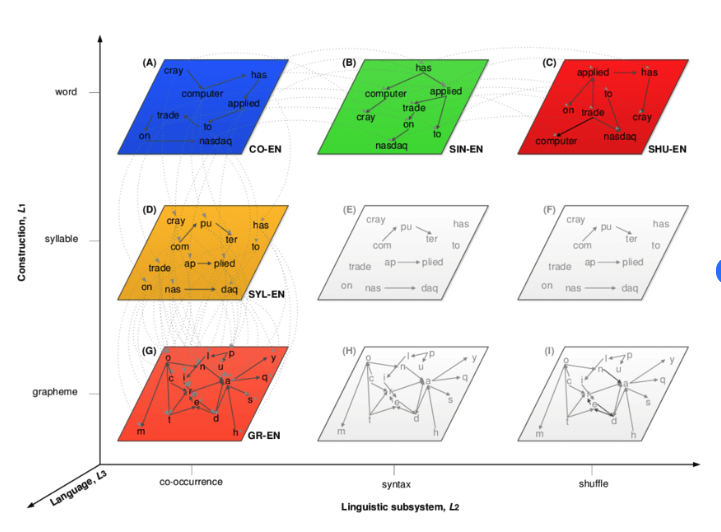

### We combine the concepts of Multilayer networks with the propositions to create a semantic knowledge graph

Relevant articles are: https://arxiv.org/pdf/2312.06648.pdf and   https://link.springer.com/article/10.3758/s13423-024-02473-9

# Demo time

In [8]:
# If you want to reset the cognee system, you can use the following command:

import cognee

await cognee.prune.prune_system()

We load the data from a local folder

In [ ]:
from os import path
import cognee

# Absolute path to the data directory
data_dir = path.abspath("../.data")

cognee.config.data_root_directory(data_dir)

datasets = cognee.datasets.discover_datasets(data_dir)
print(datasets)

results = await cognee.add(f"data://{data_dir}", datasets[0])

for result in results:
    print(result)


After the data has been added, we can check the results:

In [ ]:
import cognee

datasets = cognee.datasets.list_datasets()

for dataset in datasets:
    print(dataset)
    data_from_dataset = cognee.datasets.list_data(dataset)
    for file_info in data_from_dataset:
        print(file_info) 


All good, let's cognify it.

In [ ]:
import cognee
from cognee.shared.utils import render_graph

graph = await cognee.cognify()

graph_url = await render_graph(graph)
print(graph_url)


In [ ]:
We get the url to the graph on graphistry, showing nodes and connections made by the cognify process.

We can also use the cognee.search module to explore the knowledge.

In [ ]:
from cognee import search
from cognee.api.v1.search import SearchType

params = {'query': 'Ministarstvo', 'other_param': {"node_id": "LLM_LAYER_SUMMARY:DOCUMENT:881ecb36-2819-54c3-8147-ed80293084d6"}}

results = await search(SearchType.INSIGHTS, params)

for result in results[0]:
    print(result)

# Some common questions

- This tool is not a replacement for vector databases or Langchain, it's an extension 
- We want to help map the old data world to the new one
- Local models and evals are on the roadmap
- The relationships in the graph are customizable, so is the graph model. It is something we will continue exploring

# Give us a star if you like it!
https://github.com/topoteretes/cognee